In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs

In [2]:
ds=xr.open_dataset('/nird/datalake/NS1004K/elihho/tes0004_echam6_BOT_mm_0_1850_tpr.nc')
da=xr.open_dataset('/nird/datalake/NS1004K/elihho/slo0059_echam6_BOT_mm_0_1850_tpr.nc')

/usr/lib64/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


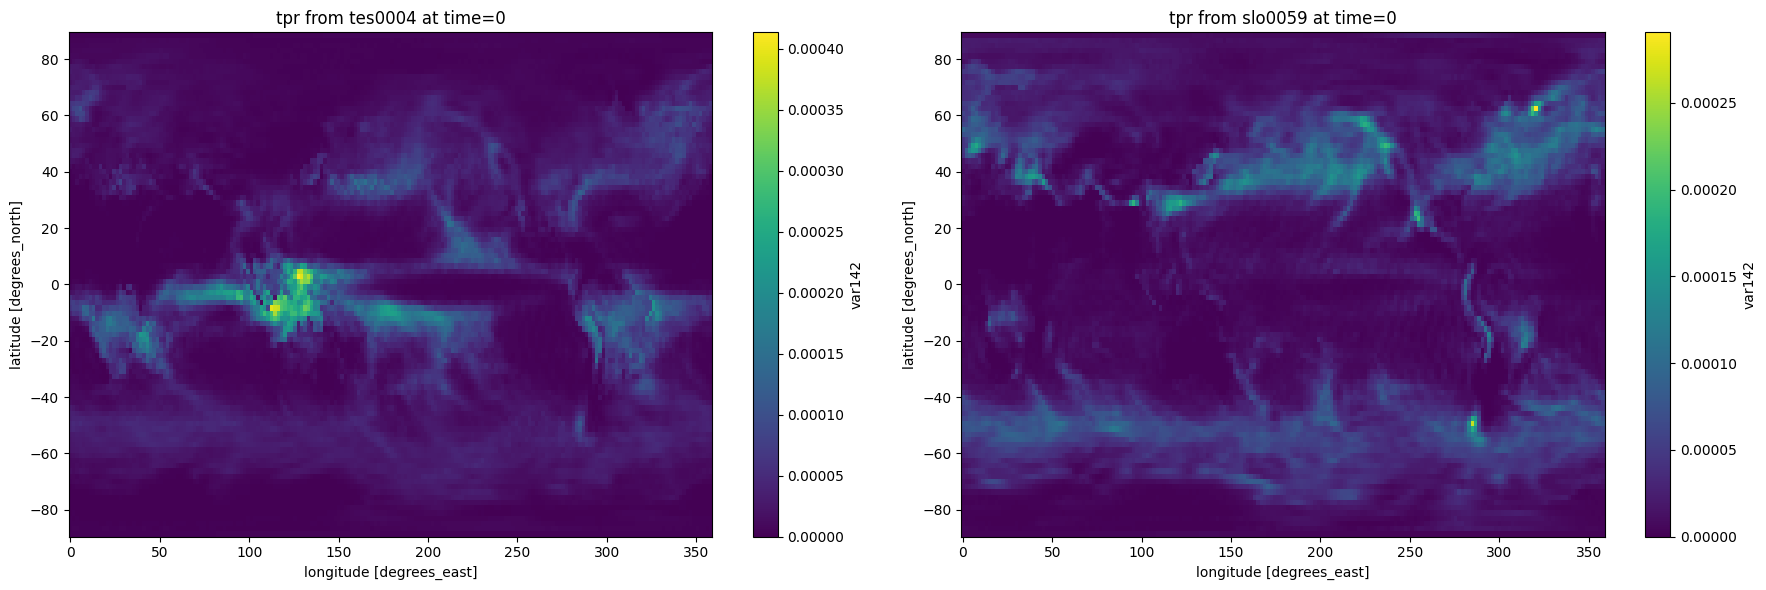

In [4]:
var_tes = ds['var142']
var_slo = da['var142']

# Select a single time step (e.g., the first one)
single_time = var_tes.isel(time=0)
st=var_slo.isel(time=0)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))  # ← missing parenthesis fixed

# Plot each time slice
single_time.plot(ax=ax[0], cmap='viridis')
ax[0].set_title("tpr from tes0004 at time=0")

st.plot(ax=ax[1], cmap='viridis')
ax[1].set_title("tpr from slo0059 at time=0")

plt.tight_layout()
plt.show()

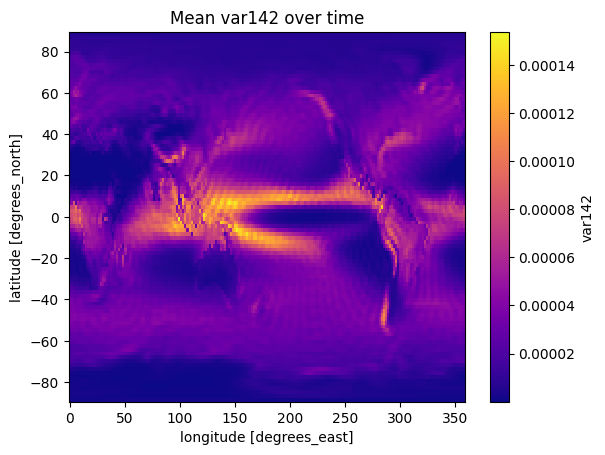

In [5]:
mean_map = ds['var142'].mean(dim='time')
mean_map.plot(cmap='plasma')
plt.title("Mean var142 over time")
plt.show()

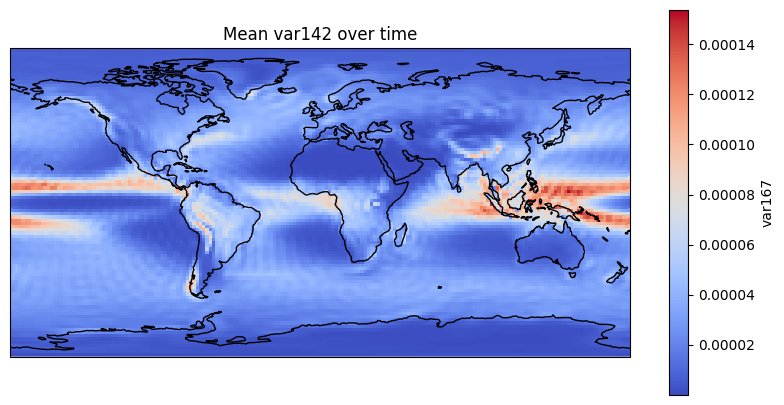

In [6]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Select a time slice
data = ds['var142'].mean(dim='time')

# Plot
data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'var142'})
ax.coastlines()
ax.set_title('Mean var142 over time')
plt.show()